# Importing Libraries and Datasets

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
minute_MET = pd.read_csv(r"data\minuteMETsNarrow_merged.csv",encoding = "utf-8")
minute_intensity = pd.read_csv(r"data\minuteIntensitiesNarrow_merged.csv",encoding = "utf-8")
minute_steps = pd.read_csv(r"data\minuteStepsNarrow_merged.csv",encoding = "utf-8")
minute_sleep = pd.read_csv(r"data\minuteSleep_merged.csv",encoding = "utf-8")
minute_calories = pd.read_csv(r"data\minuteCaloriesNarrow_merged.csv",encoding = "utf-8")
hourly_steps = pd.read_csv(r"data\hourlySteps_merged.csv",encoding = "utf-8")
hourly_intensity = pd.read_csv(r"data\hourlyIntensities_merged.csv",encoding = "utf-8")
hourly_calories = pd.read_csv(r"data\hourlyCalories_merged.csv",encoding = "utf-8")
heartrate_seconds = pd.read_csv(r"data\heartrate_seconds_merged.csv",encoding = "utf-8")
daily_steps = pd.read_csv(r"data\dailySteps_merged.csv",encoding = "utf-8")
daily_intensity = pd.read_csv(r"data\dailyIntensities_merged.csv",encoding = "utf-8")
daily_calories = pd.read_csv(r"data\dailyCalories_merged.csv",encoding = "utf-8")
daily_activity = pd.read_csv(r"data\dailyActivity_merged.csv",encoding = "utf-8")
sleepday = pd.read_csv(r"data\sleepDay_merged.csv",encoding = "utf-8")
weight_log_info = pd.read_csv(r"data\weightLogInfo_merged.csv",encoding = "utf-8")

# Data Exploration and Cleaning

### 1) minute_MET

In [3]:
minute_MET.head()

,Id,ActivityMinute,METs
0,1503960366,4/12/2016 12:00:00 AM,10
1,1503960366,4/12/2016 12:01:00 AM,10
2,1503960366,4/12/2016 12:02:00 AM,10
3,1503960366,4/12/2016 12:03:00 AM,10
4,1503960366,4/12/2016 12:04:00 AM,10


In [4]:
minute_MET.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1325580 entries, 0 to 1325579
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   Id              1325580 non-null  int64 
 1   ActivityMinute  1325580 non-null  object
 2   METs            1325580 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 30.3+ MB


In [5]:
minute_MET['ActivityMinute'] = pd.to_datetime(minute_MET['ActivityMinute'])

In [6]:
minute_MET.describe()

,Id,METs
count,1.325580e+06,1.325580e+06
mean,4.847898e+09,1.469001e+01
std,2.422313e+09,1.205541e+01
min,1.503960e+09,0.000000e+00
25%,2.320127e+09,1.000000e+01
50%,4.445115e+09,1.000000e+01
75%,6.962181e+09,1.100000e+01
max,8.877689e+09,1.570000e+02


In [7]:
minute_MET['date'] = minute_MET['ActivityMinute'].dt.date
minute_MET['date'] = pd.to_datetime(minute_MET['date'])
minute_MET

,Id,ActivityMinute,METs,date
0,1503960366,2016-04-12 00:00:00,10,2016-04-12
1,1503960366,2016-04-12 00:01:00,10,2016-04-12
2,1503960366,2016-04-12 00:02:00,10,2016-04-12
3,1503960366,2016-04-12 00:03:00,10,2016-04-12
4,1503960366,2016-04-12 00:04:00,10,2016-04-12
...,...,...,...,...
1325575,8877689391,2016-05-12 13:55:00,11,2016-05-12
1325576,8877689391,2016-05-12 13:56:00,11,2016-05-12
1325577,8877689391,2016-05-12 13:57:00,11,2016-05-12
1325578,8877689391,2016-05-12 13:58:00,11,2016-05-12


In [8]:
minute_MET[(minute_MET['Id'] == 2022484408) & (minute_MET['date'] == pd.to_datetime('2016-04-13'))].describe()

,Id,METs
count,1.440000e+03,1440.000000
mean,2.022484e+09,17.412500
std,0.000000e+00,15.029435
min,2.022484e+09,10.000000
25%,2.022484e+09,10.000000
50%,2.022484e+09,10.000000
75%,2.022484e+09,13.000000
max,2.022484e+09,104.000000


In [9]:
minute_MET[(minute_MET['Id'] == 2022484408) & (minute_MET['date'] == pd.to_datetime('2016-04-13')) & (minute_MET['METs']>60)].shape

(50, 4)

###### Correction in Data

In [10]:
minute_MET['METs'] = minute_MET['METs']/10
minute_MET.head()

,Id,ActivityMinute,METs,date
0,1503960366,2016-04-12 00:00:00,1.0,2016-04-12
1,1503960366,2016-04-12 00:01:00,1.0,2016-04-12
2,1503960366,2016-04-12 00:02:00,1.0,2016-04-12
3,1503960366,2016-04-12 00:03:00,1.0,2016-04-12
4,1503960366,2016-04-12 00:04:00,1.0,2016-04-12


In [11]:
minute_MET.describe()

,Id,METs
count,1.325580e+06,1.325580e+06
mean,4.847898e+09,1.469001e+00
std,2.422313e+09,1.205541e+00
min,1.503960e+09,0.000000e+00
25%,2.320127e+09,1.000000e+00
50%,4.445115e+09,1.000000e+00
75%,6.962181e+09,1.100000e+00
max,8.877689e+09,1.570000e+01


In [12]:
# Boolean arguments gathered in a tuple
# the negating expression "~" does not suppert negating a list or series , thiu we pass a tuple
condition = (minute_MET['METs'] == 0)
minute_MET = minute_MET[~condition] 

In [13]:
print("Dataset: minute_MET")
print(f"dataset duplicates: {minute_MET.duplicated().values.sum()}")
print(f"dataset shape : {minute_MET.shape}")
print(f"Dataset has {minute_MET.isnull().values.sum()} missing values")
print(f"dataset sample size : {minute_MET['Id'].nunique()}")

Dataset: minute_MET
dataset duplicates: 0
dataset shape : (1325573, 4)
Dataset has 0 missing values
dataset sample size : 33


#### Summary
###### minute_MET:

1. According to some reserch on the MET values here are some conclusions:

    -The dataset has values which (to my understanding) are 10 times higher than ususal.

    -For an avg human, light intensity activity has <3 MET (per minute), 3 to 6 for moderate intensity and >6 for highly intense exercises , specially for the above 8 values.

    -Dataset's majority of the values are above 10 (even during sleeptime) and in some cases it went above 100 which is highly impractical.

2. I saw a pattern that if i were to divide each value by a factor of 10 it might adjust the calculation to the actual data.

3. For a Living hea;thy person ,value of MET cannor be equal to 0. So the rows corresponding to this data were removed. 

### 2) minute_intensity

In [14]:
minute_intensity.head()

,Id,ActivityMinute,Intensity
0,1503960366,4/12/2016 12:00:00 AM,0
1,1503960366,4/12/2016 12:01:00 AM,0
2,1503960366,4/12/2016 12:02:00 AM,0
3,1503960366,4/12/2016 12:03:00 AM,0
4,1503960366,4/12/2016 12:04:00 AM,0


In [15]:
minute_intensity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1325580 entries, 0 to 1325579
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   Id              1325580 non-null  int64 
 1   ActivityMinute  1325580 non-null  object
 2   Intensity       1325580 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 30.3+ MB


In [16]:
minute_intensity['ActivityMinute'] = pd.to_datetime(minute_intensity['ActivityMinute'])
minute_intensity['ActivityMinute'].dtype

dtype('<M8[ns]')

In [17]:
print("Dataset: minute_intensity")
print(f"dataset duplicates: {minute_intensity.duplicated().values.sum()}")
print(f"dataset shape : {minute_intensity.shape}")
print(f"Dataset has {minute_intensity.isnull().values.sum()} missing values")
print(f"dataset sample size : {minute_intensity['Id'].nunique()}")

Dataset: minute_intensity
dataset duplicates: 0
dataset shape : (1325580, 3)
Dataset has 0 missing values
dataset sample size : 33


### 3)minute_steps

In [18]:
minute_steps.head()

,Id,ActivityMinute,Steps
0,1503960366,4/12/2016 12:00:00 AM,0
1,1503960366,4/12/2016 12:01:00 AM,0
2,1503960366,4/12/2016 12:02:00 AM,0
3,1503960366,4/12/2016 12:03:00 AM,0
4,1503960366,4/12/2016 12:04:00 AM,0


In [19]:
minute_steps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1325580 entries, 0 to 1325579
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   Id              1325580 non-null  int64 
 1   ActivityMinute  1325580 non-null  object
 2   Steps           1325580 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 30.3+ MB


In [20]:
print("Dataset: minute_steps")
print(f"dataset duplicates: {minute_steps.duplicated().values.sum()}")
print(f"dataset shape : {minute_steps.shape}")
print(f"Dataset has {minute_steps.isnull().values.sum()} missing values")
print(f"dataset sample size : {minute_steps['Id'].nunique()}")

Dataset: minute_steps
dataset duplicates: 0
dataset shape : (1325580, 3)
Dataset has 0 missing values
dataset sample size : 33


In [21]:
minute_steps['ActivityMinute'] = pd.to_datetime(minute_steps['ActivityMinute'])
minute_steps['ActivityMinute'].dtype

dtype('<M8[ns]')

### 4) minute_sleep

In [22]:
minute_sleep.head()

,Id,date,value,logId
0,1503960366,4/12/2016 2:47:30 AM,3,11380564589
1,1503960366,4/12/2016 2:48:30 AM,2,11380564589
2,1503960366,4/12/2016 2:49:30 AM,1,11380564589
3,1503960366,4/12/2016 2:50:30 AM,1,11380564589
4,1503960366,4/12/2016 2:51:30 AM,1,11380564589


In [23]:
minute_sleep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188521 entries, 0 to 188520
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   Id      188521 non-null  int64 
 1   date    188521 non-null  object
 2   value   188521 non-null  int64 
 3   logId   188521 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 5.8+ MB


In [24]:
print("Dataset: minute_sleep")
print(f"dataset duplicates: {minute_sleep.duplicated().values.sum()}")
print(f"dataset shape : {minute_sleep.shape}")
print(f"Dataset has {minute_sleep.isnull().values.sum()} missing values")
print(f"dataset sample size : {minute_sleep['Id'].nunique()}")

Dataset: minute_sleep
dataset duplicates: 543
dataset shape : (188521, 4)
Dataset has 0 missing values
dataset sample size : 24


In [25]:
minute_sleep['date'] = pd.to_datetime(minute_sleep['date'])

In [26]:
minute_sleep = minute_sleep.drop_duplicates()
print(f"dataset duplicates: {minute_sleep.duplicated().values.sum()}")

dataset duplicates: 0


### 5) minute_calories

In [27]:
minute_calories.head()

,Id,ActivityMinute,Calories
0,1503960366,4/12/2016 12:00:00 AM,0.7865
1,1503960366,4/12/2016 12:01:00 AM,0.7865
2,1503960366,4/12/2016 12:02:00 AM,0.7865
3,1503960366,4/12/2016 12:03:00 AM,0.7865
4,1503960366,4/12/2016 12:04:00 AM,0.7865


In [28]:
minute_calories.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1325580 entries, 0 to 1325579
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   Id              1325580 non-null  int64  
 1   ActivityMinute  1325580 non-null  object 
 2   Calories        1325580 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 30.3+ MB


In [29]:
print("Dataset: minute_calories")
print(f"dataset duplicates: {minute_calories.duplicated().values.sum()}")
print(f"dataset shape : {minute_calories.shape}")
print(f"Dataset has {minute_calories.isnull().values.sum()} missing values")
print(f"dataset sample size : {minute_calories['Id'].nunique()}")

Dataset: minute_calories
dataset duplicates: 0
dataset shape : (1325580, 3)
Dataset has 0 missing values
dataset sample size : 33


In [30]:
minute_calories['ActivityMinute'] = pd.to_datetime(minute_calories['ActivityMinute'])

### 6) hourly_steps

In [31]:
hourly_steps.head()

,Id,ActivityHour,StepTotal
0,1503960366,4/12/2016 12:00:00 AM,373
1,1503960366,4/12/2016 1:00:00 AM,160
2,1503960366,4/12/2016 2:00:00 AM,151
3,1503960366,4/12/2016 3:00:00 AM,0
4,1503960366,4/12/2016 4:00:00 AM,0


In [32]:
hourly_steps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22099 entries, 0 to 22098
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Id            22099 non-null  int64 
 1   ActivityHour  22099 non-null  object
 2   StepTotal     22099 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 518.1+ KB


In [33]:
print("Dataset: hourly_steps")
print(f"dataset duplicates: {hourly_steps.duplicated().values.sum()}")
print(f"dataset shape : {hourly_steps.shape}")
print(f"Dataset has {hourly_steps.isnull().values.sum()} missing values")
print(f"dataset sample size : {hourly_steps['Id'].nunique()}")

Dataset: hourly_steps
dataset duplicates: 0
dataset shape : (22099, 3)
Dataset has 0 missing values
dataset sample size : 33


In [34]:
hourly_steps['ActivityHour'] = pd.to_datetime(hourly_steps['ActivityHour'])

### 7) hourly_intensity

In [35]:
hourly_intensity.head()

,Id,ActivityHour,TotalIntensity,AverageIntensity
0,1503960366,4/12/2016 12:00:00 AM,20,0.333333
1,1503960366,4/12/2016 1:00:00 AM,8,0.133333
2,1503960366,4/12/2016 2:00:00 AM,7,0.116667
3,1503960366,4/12/2016 3:00:00 AM,0,0.000000
4,1503960366,4/12/2016 4:00:00 AM,0,0.000000


In [36]:
hourly_intensity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22099 entries, 0 to 22098
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id                22099 non-null  int64  
 1   ActivityHour      22099 non-null  object 
 2   TotalIntensity    22099 non-null  int64  
 3   AverageIntensity  22099 non-null  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 690.7+ KB


In [37]:
print("Dataset: hourly_intensity")
print(f"dataset duplicates: {hourly_intensity.duplicated().values.sum()}")
print(f"dataset shape : {hourly_intensity.shape}")
print(f"Dataset has {hourly_intensity.isnull().values.sum()} missing values")
print(f"dataset sample size : {hourly_intensity['Id'].nunique()}")

Dataset: hourly_intensity
dataset duplicates: 0
dataset shape : (22099, 4)
Dataset has 0 missing values
dataset sample size : 33


In [38]:
hourly_intensity['ActivityHour'] = pd.to_datetime(hourly_intensity['ActivityHour'])

### 8) hourly_calories

In [39]:
hourly_calories.head()

,Id,ActivityHour,Calories
0,1503960366,4/12/2016 12:00:00 AM,81
1,1503960366,4/12/2016 1:00:00 AM,61
2,1503960366,4/12/2016 2:00:00 AM,59
3,1503960366,4/12/2016 3:00:00 AM,47
4,1503960366,4/12/2016 4:00:00 AM,48


In [40]:
hourly_calories.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22099 entries, 0 to 22098
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Id            22099 non-null  int64 
 1   ActivityHour  22099 non-null  object
 2   Calories      22099 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 518.1+ KB


In [41]:
print("Dataset: hourly_calories")
print(f"dataset duplicates: {hourly_calories.duplicated().values.sum()}")
print(f"dataset shape : {hourly_calories.shape}")
print(f"Dataset has {hourly_calories.isnull().values.sum()} missing values")
print(f"dataset sample size : {hourly_calories['Id'].nunique()}")

Dataset: hourly_calories
dataset duplicates: 0
dataset shape : (22099, 3)
Dataset has 0 missing values
dataset sample size : 33


In [42]:
hourly_calories['ActivityHour'] = pd.to_datetime(hourly_calories['ActivityHour'])

### 9) heartrate_seconds

In [43]:
heartrate_seconds.head()

,Id,Time,Value
0,2022484408,4/12/2016 7:21:00 AM,97
1,2022484408,4/12/2016 7:21:05 AM,102
2,2022484408,4/12/2016 7:21:10 AM,105
3,2022484408,4/12/2016 7:21:20 AM,103
4,2022484408,4/12/2016 7:21:25 AM,101


In [44]:
heartrate_seconds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2483658 entries, 0 to 2483657
Data columns (total 3 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   Id      int64 
 1   Time    object
 2   Value   int64 
dtypes: int64(2), object(1)
memory usage: 56.8+ MB


In [45]:
print("Dataset: heartrate_seconds")
print(f"dataset duplicates: {heartrate_seconds.duplicated().values.sum()}")
print(f"dataset shape : {heartrate_seconds.shape}")
print(f"Dataset has {heartrate_seconds.isnull().values.sum()} missing values")
print(f"dataset sample size : {heartrate_seconds['Id'].nunique()}")

Dataset: heartrate_seconds
dataset duplicates: 0
dataset shape : (2483658, 3)
Dataset has 0 missing values
dataset sample size : 14


In [46]:
heartrate_seconds['Time'] = pd.to_datetime(heartrate_seconds['Time'])

### 10) daily_steps

In [47]:
daily_steps.head()

,Id,ActivityDay,StepTotal
0,1503960366,4/12/2016,13162
1,1503960366,4/13/2016,10735
2,1503960366,4/14/2016,10460
3,1503960366,4/15/2016,9762
4,1503960366,4/16/2016,12669


In [48]:
daily_steps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Id           940 non-null    int64 
 1   ActivityDay  940 non-null    object
 2   StepTotal    940 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 22.2+ KB


In [49]:
print("Dataset: daily_steps")
print(f"dataset duplicates: {daily_steps.duplicated().values.sum()}")
print(f"dataset shape : {daily_steps.shape}")
print(f"Dataset has {daily_steps.isnull().values.sum()} missing values")
print(f"dataset sample size : {daily_steps['Id'].nunique()}")

Dataset: daily_steps
dataset duplicates: 0
dataset shape : (940, 3)
Dataset has 0 missing values
dataset sample size : 33


In [50]:
daily_steps['ActivityDay'] = pd.to_datetime(daily_steps['ActivityDay'])

### 11) daily_intensity

In [51]:
daily_intensity.head()

,Id,ActivityDay,SedentaryMinutes,LightlyActiveMinutes,FairlyActiveMinutes,VeryActiveMinutes,SedentaryActiveDistance,LightActiveDistance,ModeratelyActiveDistance,VeryActiveDistance
0,1503960366,4/12/2016,728,328,13,25,0.0,6.06,0.55,1.88
1,1503960366,4/13/2016,776,217,19,21,0.0,4.71,0.69,1.57
2,1503960366,4/14/2016,1218,181,11,30,0.0,3.91,0.40,2.44
3,1503960366,4/15/2016,726,209,34,29,0.0,2.83,1.26,2.14
4,1503960366,4/16/2016,773,221,10,36,0.0,5.04,0.41,2.71


In [52]:
daily_intensity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDay               940 non-null    object 
 2   SedentaryMinutes          940 non-null    int64  
 3   LightlyActiveMinutes      940 non-null    int64  
 4   FairlyActiveMinutes       940 non-null    int64  
 5   VeryActiveMinutes         940 non-null    int64  
 6   SedentaryActiveDistance   940 non-null    float64
 7   LightActiveDistance       940 non-null    float64
 8   ModeratelyActiveDistance  940 non-null    float64
 9   VeryActiveDistance        940 non-null    float64
dtypes: float64(4), int64(5), object(1)
memory usage: 73.6+ KB


In [53]:
print("Dataset: daily_intensity")
print(f"dataset duplicates: {daily_intensity.duplicated().values.sum()}")
print(f"dataset shape : {daily_intensity.shape}")
print(f"Dataset has {daily_intensity.isnull().values.sum()} missing values")
print(f"dataset sample size : {daily_intensity['Id'].nunique()}")

Dataset: daily_intensity
dataset duplicates: 0
dataset shape : (940, 10)
Dataset has 0 missing values
dataset sample size : 33


In [54]:
daily_intensity['ActivityDay'] = pd.to_datetime(daily_intensity['ActivityDay'])

### 12) daily_calories

In [55]:
daily_calories.head()

,Id,ActivityDay,Calories
0,1503960366,4/12/2016,1985
1,1503960366,4/13/2016,1797
2,1503960366,4/14/2016,1776
3,1503960366,4/15/2016,1745
4,1503960366,4/16/2016,1863


In [56]:
daily_calories.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Id           940 non-null    int64 
 1   ActivityDay  940 non-null    object
 2   Calories     940 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 22.2+ KB


In [57]:
print("Dataset: daily_calories")
print(f"dataset duplicates: {daily_calories.duplicated().values.sum()}")
print(f"dataset shape : {daily_calories.shape}")
print(f"Dataset has {daily_calories.isnull().values.sum()} missing values")
print(f"dataset sample size : {daily_calories['Id'].nunique()}")

Dataset: daily_calories
dataset duplicates: 0
dataset shape : (940, 3)
Dataset has 0 missing values
dataset sample size : 33


In [58]:
daily_calories['ActivityDay'] = pd.to_datetime(daily_calories['ActivityDay'])

### 13) daily_activity

In [59]:
daily_activity.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [60]:
daily_activity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDate              940 non-null    object 
 2   TotalSteps                940 non-null    int64  
 3   TotalDistance             940 non-null    float64
 4   TrackerDistance           940 non-null    float64
 5   LoggedActivitiesDistance  940 non-null    float64
 6   VeryActiveDistance        940 non-null    float64
 7   ModeratelyActiveDistance  940 non-null    float64
 8   LightActiveDistance       940 non-null    float64
 9   SedentaryActiveDistance   940 non-null    float64
 10  VeryActiveMinutes         940 non-null    int64  
 11  FairlyActiveMinutes       940 non-null    int64  
 12  LightlyActiveMinutes      940 non-null    int64  
 13  SedentaryMinutes          940 non-null    int64  
 14  Calories  

In [61]:
print("Dataset: daily_activity")
print(f"dataset duplicates: {daily_activity.duplicated().values.sum()}")
print(f"dataset shape : {daily_activity.shape}")
print(f"Dataset has {daily_activity.isnull().values.sum()} missing values")
print(f"dataset sample size : {daily_activity['Id'].nunique()}")

Dataset: daily_activity
dataset duplicates: 0
dataset shape : (940, 15)
Dataset has 0 missing values
dataset sample size : 33


In [62]:
daily_activity['ActivityDate'] = pd.to_datetime(daily_activity['ActivityDate'])

### 14) weight_log_info

In [63]:
weight_log_info.head()

,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
0,1503960366,5/2/2016 11:59:59 PM,52.599998,115.963147,22.0,22.650000,True,1462233599000
1,1503960366,5/3/2016 11:59:59 PM,52.599998,115.963147,NaN,22.650000,True,1462319999000
2,1927972279,4/13/2016 1:08:52 AM,133.500000,294.317120,NaN,47.540001,False,1460509732000
3,2873212765,4/21/2016 11:59:59 PM,56.700001,125.002104,NaN,21.450001,True,1461283199000
4,2873212765,5/12/2016 11:59:59 PM,57.299999,126.324875,NaN,21.690001,True,1463097599000


In [64]:
weight_log_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              67 non-null     int64  
 1   Date            67 non-null     object 
 2   WeightKg        67 non-null     float64
 3   WeightPounds    67 non-null     float64
 4   Fat             2 non-null      float64
 5   BMI             67 non-null     float64
 6   IsManualReport  67 non-null     bool   
 7   LogId           67 non-null     int64  
dtypes: bool(1), float64(4), int64(2), object(1)
memory usage: 3.9+ KB


In [65]:
print("Dataset: weight_log_info")
print(f"dataset duplicates: {weight_log_info.duplicated().values.sum()}")
print(f"dataset shape : {weight_log_info.shape}")
print(f"Dataset has {weight_log_info.isnull().values.sum()} missing values")
print(f"dataset sample size : {weight_log_info['Id'].nunique()}")

Dataset: weight_log_info
dataset duplicates: 0
dataset shape : (67, 8)
Dataset has 65 missing values
dataset sample size : 8


In [66]:
weight_log_info['Date'] = pd.to_datetime(weight_log_info['Date'])

### 15) sleepday

In [67]:
sleepday.head()

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,4/12/2016 12:00:00 AM,1,327,346
1,1503960366,4/13/2016 12:00:00 AM,2,384,407
2,1503960366,4/15/2016 12:00:00 AM,1,412,442
3,1503960366,4/16/2016 12:00:00 AM,2,340,367
4,1503960366,4/17/2016 12:00:00 AM,1,700,712


In [68]:
sleepday.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413 entries, 0 to 412
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Id                  413 non-null    int64 
 1   SleepDay            413 non-null    object
 2   TotalSleepRecords   413 non-null    int64 
 3   TotalMinutesAsleep  413 non-null    int64 
 4   TotalTimeInBed      413 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 16.3+ KB


In [69]:
print("Dataset: sleepday")
print(f"dataset duplicates: {sleepday.duplicated().values.sum()}")
print(f"dataset shape : {sleepday.shape}")
print(f"Dataset has {sleepday.isnull().values.sum()} missing values")
print(f"dataset sample size : {sleepday['Id'].nunique()}")

Dataset: sleepday
dataset duplicates: 3
dataset shape : (413, 5)
Dataset has 0 missing values
dataset sample size : 24


In [70]:
sleepday = sleepday.drop_duplicates()

In [71]:
sleepday['SleepDay'] = pd.to_datetime(sleepday['SleepDay'])

#### Conclusion
1> Most of the datasets have a sample size more than 30 except for a few. Datasets "sleepday", "weight_log_info", "heartrate_seconds", "minute_sleep" have sample size less than 30 , but i will still keep them as they may help in drwing some conclusions

2> 4 Tables containing the minute to minute info have the same row component in the shape "1325580", also the user Id and the time aligns correctly in all these datasets, thus they can me merged .

3> Tables 'daily_calories', 'daily_intensity', 'daily_steps' contain exactly the same data as in the 'daily_activity' table so the tables can be discarded as the process will not be effected.

4> Tables 'hourly_calories', 'hourly_intesity' and 'hourly_steps' have the same shape row component (22099) and they contain the same data except their last columns that is direclty relatable. Thus the tables can be merged.

5> Almost all the tables had to be adjusted with the 'to_datetime' method by pandas.

6> Tables 'sleepday' and 'minute_sleep' had duplicates, they were removed using the 'drop_duplicate' method of dataframe.

7> Table 'weight_log_info' contains missing values.

8> In table 'minute_sleep' there are many cases when during the sleeptime and the highly active minutes, at both moments , the value is 1. This dosent offer any possible cognitive understanding of the data, neither i could find the meta data regarding this dataset. It is rather good to drop this table.

# Data Transformation

In [72]:
minute_merged = pd.merge(minute_MET,minute_intensity,on=['Id','ActivityMinute'],how='inner')
minute_merged = pd.merge(minute_merged,minute_calories,on=['Id','ActivityMinute'],how='inner')
minute_merged = pd.merge(minute_merged,minute_steps,on=['Id','ActivityMinute'],how='inner')
minute_merged.head(10)

,Id,ActivityMinute,METs,date,Intensity,Calories,Steps
0,1503960366,2016-04-12 00:00:00,1.0,2016-04-12,0,0.7865,0
1,1503960366,2016-04-12 00:01:00,1.0,2016-04-12,0,0.7865,0
2,1503960366,2016-04-12 00:02:00,1.0,2016-04-12,0,0.7865,0
3,1503960366,2016-04-12 00:03:00,1.0,2016-04-12,0,0.7865,0
4,1503960366,2016-04-12 00:04:00,1.0,2016-04-12,0,0.7865,0
5,1503960366,2016-04-12 00:05:00,1.2,2016-04-12,0,0.9438,0
6,1503960366,2016-04-12 00:06:00,1.2,2016-04-12,0,0.9438,0
7,1503960366,2016-04-12 00:07:00,1.2,2016-04-12,0,0.9438,0
8,1503960366,2016-04-12 00:08:00,1.2,2016-04-12,0,0.9438,0
9,1503960366,2016-04-12 00:09:00,1.2,2016-04-12,0,0.9438,0


In [73]:
hourly_merged = pd.merge(hourly_calories,hourly_steps,on=['Id','ActivityHour'],how='inner')
hourly_merged = pd.merge(hourly_merged,hourly_intensity,on=['Id','ActivityHour'],how='inner')
hourly_merged.head(10)

,Id,ActivityHour,Calories,StepTotal,TotalIntensity,AverageIntensity
0,1503960366,2016-04-12 00:00:00,81,373,20,0.333333
1,1503960366,2016-04-12 01:00:00,61,160,8,0.133333
2,1503960366,2016-04-12 02:00:00,59,151,7,0.116667
3,1503960366,2016-04-12 03:00:00,47,0,0,0.000000
4,1503960366,2016-04-12 04:00:00,48,0,0,0.000000
5,1503960366,2016-04-12 05:00:00,48,0,0,0.000000
6,1503960366,2016-04-12 06:00:00,48,0,0,0.000000
7,1503960366,2016-04-12 07:00:00,47,0,0,0.000000
8,1503960366,2016-04-12 08:00:00,68,250,13,0.216667
9,1503960366,2016-04-12 09:00:00,141,1864,30,0.500000


In [74]:
daily_activity.head(10)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863
5,1503960366,2016-04-17,9705,6.48,6.48,0.0,3.19,0.78,2.51,0.0,38,20,164,539,1728
6,1503960366,2016-04-18,13019,8.59,8.59,0.0,3.25,0.64,4.71,0.0,42,16,233,1149,1921
7,1503960366,2016-04-19,15506,9.88,9.88,0.0,3.53,1.32,5.03,0.0,50,31,264,775,2035
8,1503960366,2016-04-20,10544,6.68,6.68,0.0,1.96,0.48,4.24,0.0,28,12,205,818,1786
9,1503960366,2016-04-21,9819,6.34,6.34,0.0,1.34,0.35,4.65,0.0,19,8,211,838,1775


These are our 3 major tables for the analysis

In [75]:
# introducing day names and hours in the required tables
daily_activity['WeekDay'] = daily_activity['ActivityDate'].dt.day_name()

hourly_merged['hour'] = hourly_merged['ActivityHour'].dt.hour
hourly_merged['Weekday'] = hourly_merged['ActivityHour'].dt.day_name()

minute_merged['hour'] = minute_merged['ActivityMinute'].dt.hour
minute_merged['Weekday'] = minute_merged['ActivityMinute'].dt.day_name()

# dropping the previously intoduced column date in the minute_merged
minute_merged.drop(['date'],axis=1,inplace=True)

In [76]:
daily_activity.head(2)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,WeekDay
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,Tuesday
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,Wednesday


In [77]:
minute_merged.head(2)

,Id,ActivityMinute,METs,Intensity,Calories,Steps,hour,Weekday
0,1503960366,2016-04-12 00:00:00,1.0,0,0.7865,0,0,Tuesday
1,1503960366,2016-04-12 00:01:00,1.0,0,0.7865,0,0,Tuesday


In [78]:
hourly_merged.head(2)

,Id,ActivityHour,Calories,StepTotal,TotalIntensity,AverageIntensity,hour,Weekday
0,1503960366,2016-04-12 00:00:00,81,373,20,0.333333,0,Tuesday
1,1503960366,2016-04-12 01:00:00,61,160,8,0.133333,1,Tuesday


In [79]:
# Creating 3 new columns in the 'TotalActiveMinutes', 'TotalMinutes', 'TotalActiveHours' in the
# daily_activity column, the 1st column will be the sum of 3 columns from the daily_activity column
# -> 'VeryActiveMinutes', 'FairlyAcvtiveMinutes', 'LightlyActiveMinutes' and the 2n mentioned column will be
# total sum all the minute columns , whereas the 3rd mentioned column will be the calculated roundoff 
# value from the 1st mentioned column

daily_activity["TotalActiveMinutes"] = daily_activity["VeryActiveMinutes"] + daily_activity["FairlyActiveMinutes"] + daily_activity["LightlyActiveMinutes"]
daily_activity['TotalMinutes'] = daily_activity['TotalActiveMinutes'] + daily_activity['SedentaryMinutes']
daily_activity['TotalActiveHours'] = round(daily_activity['TotalActiveMinutes']/60)

In [80]:
daily_activity.drop(columns=['TrackerDistance','LoggedActivitiesDistance'],axis=1,inplace=True)
daily_activity = daily_activity[['Id','ActivityDate','WeekDay','TotalSteps','TotalDistance','VeryActiveDistance','ModeratelyActiveDistance','LightActiveDistance','SedentaryActiveDistance','VeryActiveMinutes','FairlyActiveMinutes','LightlyActiveMinutes','SedentaryMinutes','TotalActiveMinutes','TotalMinutes','TotalActiveHours','Calories']]
daily_activity.tail()

,Id,ActivityDate,WeekDay,TotalSteps,TotalDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,TotalActiveMinutes,TotalMinutes,TotalActiveHours,Calories
935,8877689391,2016-05-08,Sunday,10686,8.110000,1.08,0.20,6.80,0.00,17,4,245,1174,266,1440,4.0,2847
936,8877689391,2016-05-09,Monday,20226,18.250000,11.10,0.80,6.24,0.05,73,19,217,1131,309,1440,5.0,3710
937,8877689391,2016-05-10,Tuesday,10733,8.150000,1.35,0.46,6.28,0.00,18,11,224,1187,253,1440,4.0,2832
938,8877689391,2016-05-11,Wednesday,21420,19.559999,13.22,0.41,5.89,0.00,88,12,213,1127,313,1440,5.0,3832
939,8877689391,2016-05-12,Thursday,8064,6.120000,1.82,0.04,4.25,0.00,23,1,137,770,161,931,3.0,1849


In [81]:
# introducing day names in the sleepday
sleepday['day'] = sleepday['SleepDay'].dt.day_name()

In [82]:
sleepday.head(2)

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,day
0,1503960366,2016-04-12,1,327,346,Tuesday
1,1503960366,2016-04-13,2,384,407,Wednesday


###### RESAMPLING the heartrate_seconds table using pandas

In [83]:
heartrate_seconds.head()

,Id,Time,Value
0,2022484408,2016-04-12 07:21:00,97
1,2022484408,2016-04-12 07:21:05,102
2,2022484408,2016-04-12 07:21:10,105
3,2022484408,2016-04-12 07:21:20,103
4,2022484408,2016-04-12 07:21:25,101


In [84]:
heartrate_seconds.set_index('Time',inplace=True)
heartrate_avg = heartrate_seconds.groupby('Id').resample('T').mean()
heartrate_avg.drop('Id',axis=1,inplace=True)
heartrate_avg.reset_index(inplace=True)

In [85]:
heartrate_avg.head()

,Id,Time,Value
0,2022484408,2016-04-12 07:21:00,101.600000
1,2022484408,2016-04-12 07:22:00,87.888889
2,2022484408,2016-04-12 07:23:00,58.000000
3,2022484408,2016-04-12 07:24:00,58.000000
4,2022484408,2016-04-12 07:25:00,56.777778


Creating a specific table minute_heartrate_merged for side analysis

In [86]:
heartrate_avg.rename(columns={'Time':'ActivityMinute','Value':'Heartrate'},inplace=True)
minute_heartrate_merged = pd.merge(minute_merged,heartrate_avg,on=['Id','ActivityMinute'],how='inner')
minute_heartrate_merged.head(10)

,Id,ActivityMinute,METs,Intensity,Calories,Steps,hour,Weekday,Heartrate
0,2022484408,2016-04-12 07:21:00,3.2,1,3.32064,17,7,Tuesday,101.600000
1,2022484408,2016-04-12 07:22:00,3.8,1,3.94326,9,7,Tuesday,87.888889
2,2022484408,2016-04-12 07:23:00,1.3,0,1.34901,0,7,Tuesday,58.000000
3,2022484408,2016-04-12 07:24:00,1.0,0,1.03770,0,7,Tuesday,58.000000
4,2022484408,2016-04-12 07:25:00,1.0,0,1.03770,0,7,Tuesday,56.777778
5,2022484408,2016-04-12 07:26:00,2.4,1,2.49048,7,7,Tuesday,53.166667
6,2022484408,2016-04-12 07:27:00,1.0,0,1.03770,0,7,Tuesday,55.142857
7,2022484408,2016-04-12 07:28:00,2.6,1,2.69802,13,7,Tuesday,65.666667
8,2022484408,2016-04-12 07:29:00,2.4,1,2.49048,9,7,Tuesday,73.000000
9,2022484408,2016-04-12 07:30:00,2.6,1,2.69802,15,7,Tuesday,78.000000


In [87]:
merge_df = pd.merge(hourly_calories,hourly_steps,on=['Id','ActivityHour'],how='inner')
merge_df['WeekDay'] = merge_df['ActivityHour'].dt.day_name()
merge_df['DateHour'] =  merge_df['ActivityHour'].dt.hour
merge_df.head()

,Id,ActivityHour,Calories,StepTotal,WeekDay,DateHour
0,1503960366,2016-04-12 00:00:00,81,373,Tuesday,0
1,1503960366,2016-04-12 01:00:00,61,160,Tuesday,1
2,1503960366,2016-04-12 02:00:00,59,151,Tuesday,2
3,1503960366,2016-04-12 03:00:00,47,0,Tuesday,3
4,1503960366,2016-04-12 04:00:00,48,0,Tuesday,4


In [88]:
sleepday['WeekDay'] = sleepday['day']
merge_df['ActivityDay'] = merge_df['ActivityHour'].dt.date
merge_df.drop(columns = ['ActivityHour'], axis=1, inplace=True)

In [89]:
merge_df["ActivityDay"] = pd.to_datetime(merge_df["ActivityDay"])

In [90]:
sleepday = sleepday.rename(columns = {'SleepDay' : 'ActivityDay'})
sleepday = pd.merge(merge_df, sleepday, on=['Id','ActivityDay','WeekDay'], how='inner')
sleepday.head()

,Id,Calories,StepTotal,WeekDay,DateHour,ActivityDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,day
0,1503960366,81,373,Tuesday,0,2016-04-12,1,327,346,Tuesday
1,1503960366,61,160,Tuesday,1,2016-04-12,1,327,346,Tuesday
2,1503960366,59,151,Tuesday,2,2016-04-12,1,327,346,Tuesday
3,1503960366,47,0,Tuesday,3,2016-04-12,1,327,346,Tuesday
4,1503960366,48,0,Tuesday,4,2016-04-12,1,327,346,Tuesday


In [91]:
# sleepday.drop(columns=['Calories_y','StepTotal_y','DateHour_x'],axis=1,inplace=True)

In [92]:
sleepday.head()

,Id,Calories,StepTotal,WeekDay,DateHour,ActivityDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,day
0,1503960366,81,373,Tuesday,0,2016-04-12,1,327,346,Tuesday
1,1503960366,61,160,Tuesday,1,2016-04-12,1,327,346,Tuesday
2,1503960366,59,151,Tuesday,2,2016-04-12,1,327,346,Tuesday
3,1503960366,47,0,Tuesday,3,2016-04-12,1,327,346,Tuesday
4,1503960366,48,0,Tuesday,4,2016-04-12,1,327,346,Tuesday


In [93]:
sleepday.drop(columns=['day'],axis=1,inplace=True)

In [94]:
sleepday.rename(columns={'Calories_x':'Calories','StepTotal_x':'StepTotal','DateHour_y':'DateHour'},inplace=True)

In [95]:
sleepday = sleepday[['Id', 'Calories', 'StepTotal', 'WeekDay', 'ActivityDay',
       'DateHour', 'TotalSleepRecords', 'TotalMinutesAsleep',
       'TotalTimeInBed']]

In [96]:
sleepday.head()

,Id,Calories,StepTotal,WeekDay,ActivityDay,DateHour,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,81,373,Tuesday,2016-04-12,0,1,327,346
1,1503960366,61,160,Tuesday,2016-04-12,1,1,327,346
2,1503960366,59,151,Tuesday,2016-04-12,2,1,327,346
3,1503960366,47,0,Tuesday,2016-04-12,3,1,327,346
4,1503960366,48,0,Tuesday,2016-04-12,4,1,327,346


#### Summary
1> At last we have 6 different tables,['minute_merged','hourly_merged'.'daily_activity'.'minute_heartrate_merged'.'sleepday'.'weight_log_info'] out of which the first three strictly follow the "samplesize>30" rule and the rest are for complementary analysis.

2> Tables [minute_MET, minute_intensity, minute_calories, minute_steps] merged to form minute_merged.

3> Tables [hourly_steps,hourly_calories,hourly_intensity] merged as hourly_merged

4> Table daily_activity had all the data available , but columns ['TotalActiveMinutes','TotalMinutes','TotalActiveHours'] were introduced for better analyzation.

5> Joined minute_merged with heartrate_seconds but aggregation is a problem, So using the resample method from the concept "Time Series Analysis" average heartrate for every minute is calculated and then tables are joined.

6> Tables ['sleepday','hourly_calories','hourly_steps'] were merged to form yet another column sleepday. It was done to furthur analyze sleep schedule alongside the weekdays, calories and steps.


#### Exporting the datasets for analysis in PostgreSQL and Tableau

In [97]:
#minute_merged.to_csv('Cleaned_data\minute_merged.csv',index=False)

In [98]:
# hourly_merged.to_csv('Cleaned_data\hourly_merged.csv',index=False)
# daily_activity.to_csv('Cleaned_data\daily_activity.csv',index=False)
# minute_heartrate_merged.to_csv('Cleaned_data\minute_heartrate_merged.csv',index=False)
# sleepday.to_csv('Cleaned_data\sleepday.csv',index=False)
# weight_log_info.to_csv('Cleaned_data\weight_log_info.csv',index=False)

# Analysis

In [99]:
minute_merged.describe()

,Id,METs,Intensity,Calories,Steps,hour
count,1.325573e+06,1.325573e+06,1.325573e+06,1.325573e+06,1.325573e+06,1.325573e+06
mean,4.847895e+09,1.469009e+00,2.005948e-01,1.623138e+00,5.336220e+00,1.141506e+01
std,2.422313e+09,1.205539e+00,5.190239e-01,1.410446e+00,1.812835e+01,6.915778e+00
min,1.503960e+09,6.000000e-01,0.000000e+00,7.027000e-01,0.000000e+00,0.000000e+00
25%,2.320127e+09,1.000000e+00,0.000000e+00,9.357000e-01,0.000000e+00,5.000000e+00
50%,4.445115e+09,1.000000e+00,0.000000e+00,1.217600e+00,0.000000e+00,1.100000e+01
75%,6.962181e+09,1.100000e+00,0.000000e+00,1.432700e+00,0.000000e+00,1.700000e+01
max,8.877689e+09,1.570000e+01,3.000000e+00,1.974995e+01,2.200000e+02,2.300000e+01


In [100]:
hourly_merged.describe()

,Id,Calories,StepTotal,TotalIntensity,AverageIntensity,hour
count,2.209900e+04,22099.000000,22099.000000,22099.000000,22099.000000,22099.000000
mean,4.848235e+09,97.386760,320.166342,12.035341,0.200589,11.415765
std,2.422500e+09,60.702622,690.384228,21.133110,0.352219,6.915140
min,1.503960e+09,42.000000,0.000000,0.000000,0.000000,0.000000
25%,2.320127e+09,63.000000,0.000000,0.000000,0.000000,5.000000
50%,4.445115e+09,83.000000,40.000000,3.000000,0.050000,11.000000
75%,6.962181e+09,108.000000,357.000000,16.000000,0.266667,17.000000
max,8.877689e+09,948.000000,10554.000000,180.000000,3.000000,23.000000


In [101]:
daily_activity.describe()

,Id,TotalSteps,TotalDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,TotalActiveMinutes,TotalMinutes,TotalActiveHours,Calories
count,9.400000e+02,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,4.855407e+09,7637.910638,5.489702,1.502681,0.567543,3.340819,0.001606,21.164894,13.564894,192.812766,991.210638,227.542553,1218.753191,3.775532,2303.609574
std,2.424805e+09,5087.150742,3.924606,2.658941,0.883580,2.040655,0.007346,32.844803,19.987404,109.174700,301.267437,121.776307,265.931767,2.057646,718.166862
min,1.503960e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
25%,2.320127e+09,3789.750000,2.620000,0.000000,0.000000,1.945000,0.000000,0.000000,0.000000,127.000000,729.750000,146.750000,989.750000,2.000000,1828.500000
50%,4.445115e+09,7405.500000,5.245000,0.210000,0.240000,3.365000,0.000000,4.000000,6.000000,199.000000,1057.500000,247.000000,1440.000000,4.000000,2134.000000
75%,6.962181e+09,10727.000000,7.712500,2.052500,0.800000,4.782500,0.000000,32.000000,19.000000,264.000000,1229.500000,317.250000,1440.000000,5.000000,2793.250000
max,8.877689e+09,36019.000000,28.030001,21.920000,6.480000,10.710000,0.110000,210.000000,143.000000,518.000000,1440.000000,552.000000,1440.000000,9.000000,4900.000000


In [102]:
minute_heartrate_merged.describe()

,Id,METs,Intensity,Calories,Steps,hour,Heartrate
count,5.420730e+05,542073.000000,542073.000000,542073.000000,542073.000000,542073.000000,333146.000000
mean,5.403392e+09,1.557955,0.224848,1.706147,5.893525,11.451035,73.709750
std,2.120972e+09,1.322094,0.550369,1.533976,18.635005,6.906426,16.559042
min,2.022484e+09,1.000000,0.000000,0.775100,0.000000,0.000000,36.800000
25%,4.020333e+09,1.000000,0.000000,1.026520,0.000000,5.000000,62.000000
50%,5.553957e+09,1.000000,0.000000,1.222600,0.000000,11.000000,70.000000
75%,6.962181e+09,1.200000,0.000000,1.434730,0.000000,17.000000,82.571429
max,8.877689e+09,14.600000,3.000000,19.255600,207.000000,23.000000,202.166667


In [149]:
sleepday.describe()

,Id,Calories,StepTotal,DateHour,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
count,9.699000e+03,9699.000000,9699.000000,9699.000000,9699.000000,9699.000000,9699.000000
mean,4.994838e+09,100.636560,357.678420,11.422312,1.121250,419.051036,458.449118
std,2.061709e+09,63.093154,652.315167,6.921310,0.348436,119.086005,127.957661
min,1.503960e+09,42.000000,0.000000,0.000000,1.000000,58.000000,61.000000
25%,3.977334e+09,63.000000,0.000000,5.000000,1.000000,361.000000,402.500000
50%,4.702922e+09,84.000000,107.000000,11.000000,1.000000,432.000000,463.000000
75%,6.962181e+09,116.000000,419.000000,17.000000,1.000000,490.000000,527.000000
max,8.792010e+09,669.000000,6357.000000,23.000000,3.000000,796.000000,961.000000


#### 1. Correlation Matrix for minute_merged

C:\Users\arins\AppData\Local\Temp\ipykernel_7340\3025866591.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  'hour', 'Weekday']].corr()


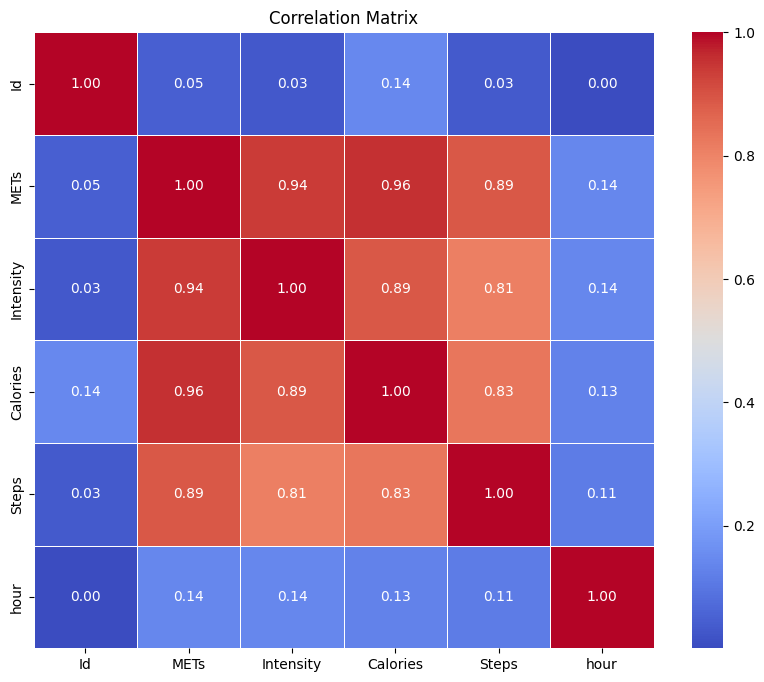

In [105]:
corr_matrix = minute_merged[['Id', 'ActivityMinute', 'METs', 'Intensity', 'Calories', 'Steps',
       'hour', 'Weekday']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

###### Key observations
1. This matrix has no negative correlation values meaning the features are all positively correlated.
2. Columns 'Calories', 'Steps', 'Intensity' and 'METs' are all positively correlated with respect to each other .

#### 2. Correlation Matrix for daily_activity

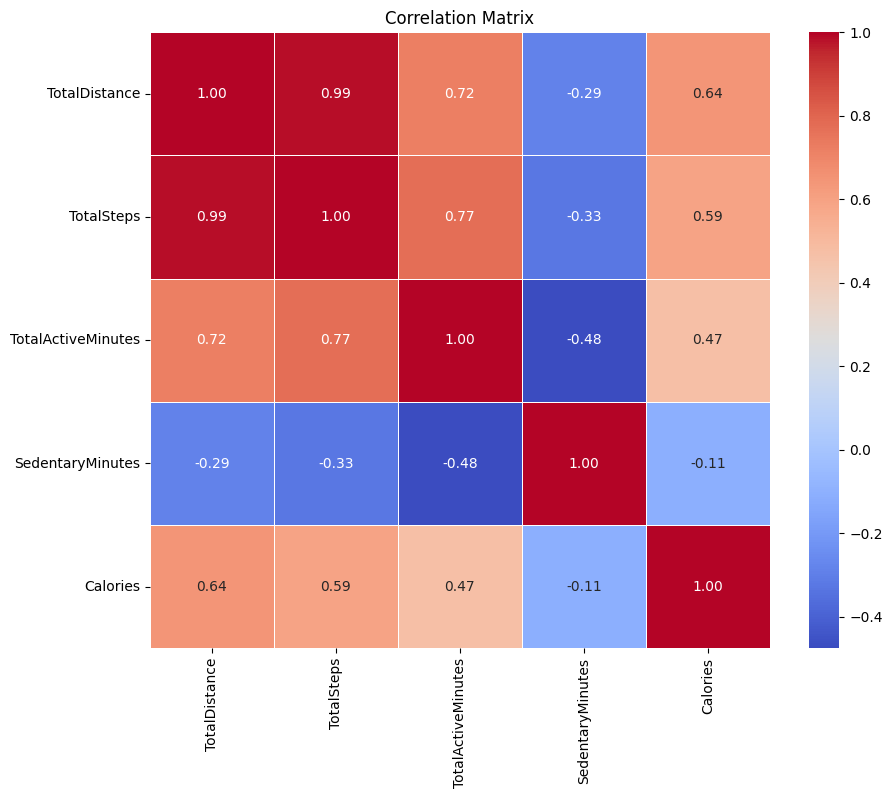

In [107]:
correlation_matrix = daily_activity[['TotalDistance','TotalSteps','TotalActiveMinutes','SedentaryMinutes','Calories']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

###### Key Points
1. There is a positive correlation between Calories and TotalActiveMinutes, TotalSteps, and TotalDistance.
2. There is a negative correlation between Calories and SedentaryMinutes.

#### 3. Comparing TotalSteps and SedetaryMinutes to Calories

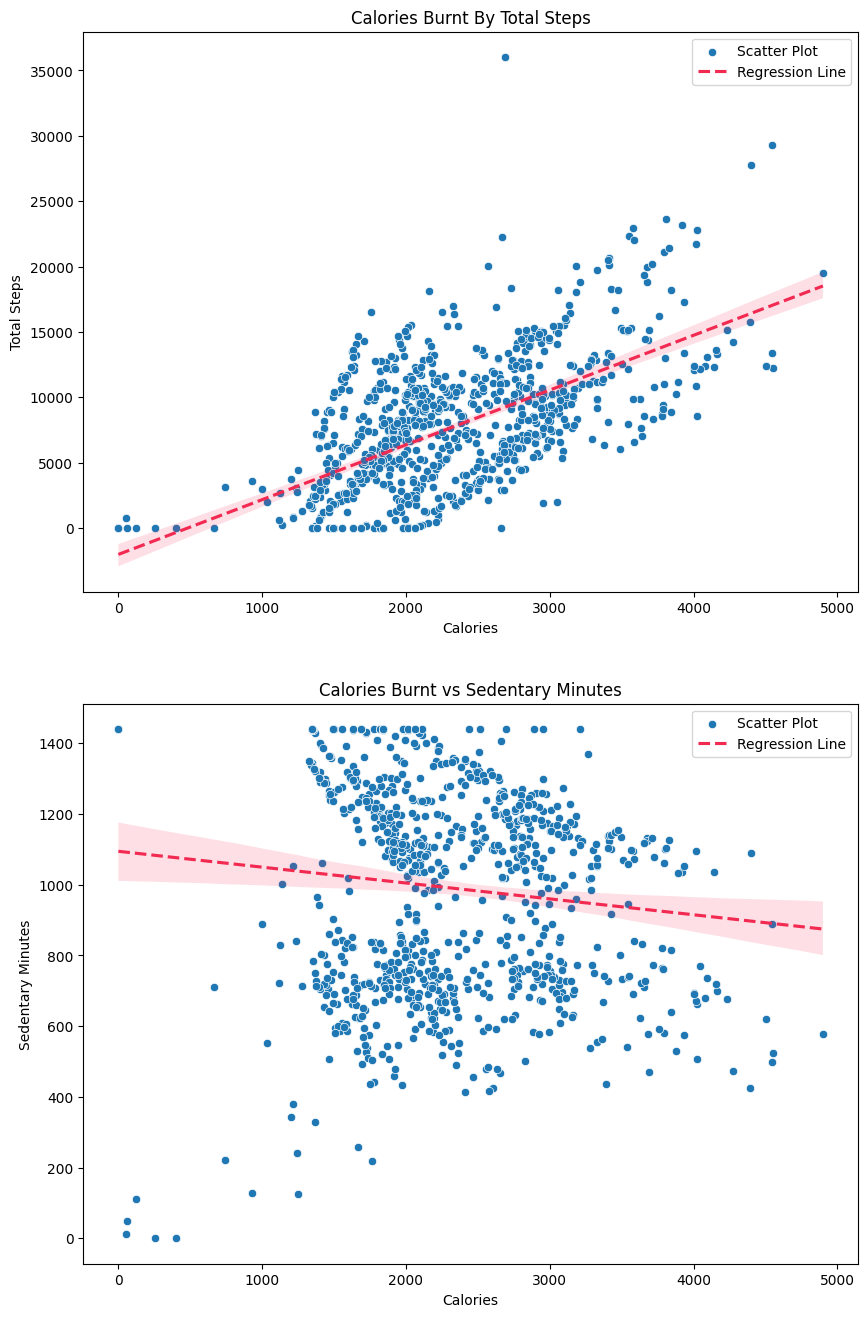

In [108]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 16))
sns.scatterplot(y=daily_activity['TotalSteps'], x=daily_activity['Calories'], ax=axes[0], label='Scatter Plot')
sns.regplot(data=daily_activity, x='Calories', y='TotalSteps', ax=axes[0], color="#f22a51", scatter=False, line_kws={'linestyle': '--'}, label='Regression Line')
axes[0].set_title('Calories Burnt By Total Steps')
axes[0].set_ylabel('Total Steps')
axes[0].set_xlabel('Calories')
axes[0].legend()

sns.scatterplot(y=daily_activity['SedentaryMinutes'], x=daily_activity['Calories'], ax=axes[1], label='Scatter Plot')
sns.regplot(data=daily_activity, x='Calories', y='SedentaryMinutes', ax=axes[1], color="#f22a51", scatter=False, line_kws={'linestyle': '--'}, label='Regression Line')
axes[1].set_title('Calories Burnt vs Sedentary Minutes')
axes[1].set_ylabel('Sedentary Minutes')
axes[1].set_xlabel('Calories')
axes[1].legend()

plt.show()

###### Key Points
1. This scatterplot and regplot gives us a clearer view of the correlation between TotalSteps and SedentaryMinutes to Calories.
2. The more the steps taken, the more the calories burnt. On the other hand, the more the Sedentary minutes, the less the calories burnt.

#### 4.  Comparing Calories and Steps to Intensity level

C:\Users\arins\AppData\Local\Temp\ipykernel_7340\2503796440.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  minute_merged_grouped = minute_merged.groupby('Intensity',as_index=False)['Calories','Steps'].mean().sort_values(by='Calories',ascending = False)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


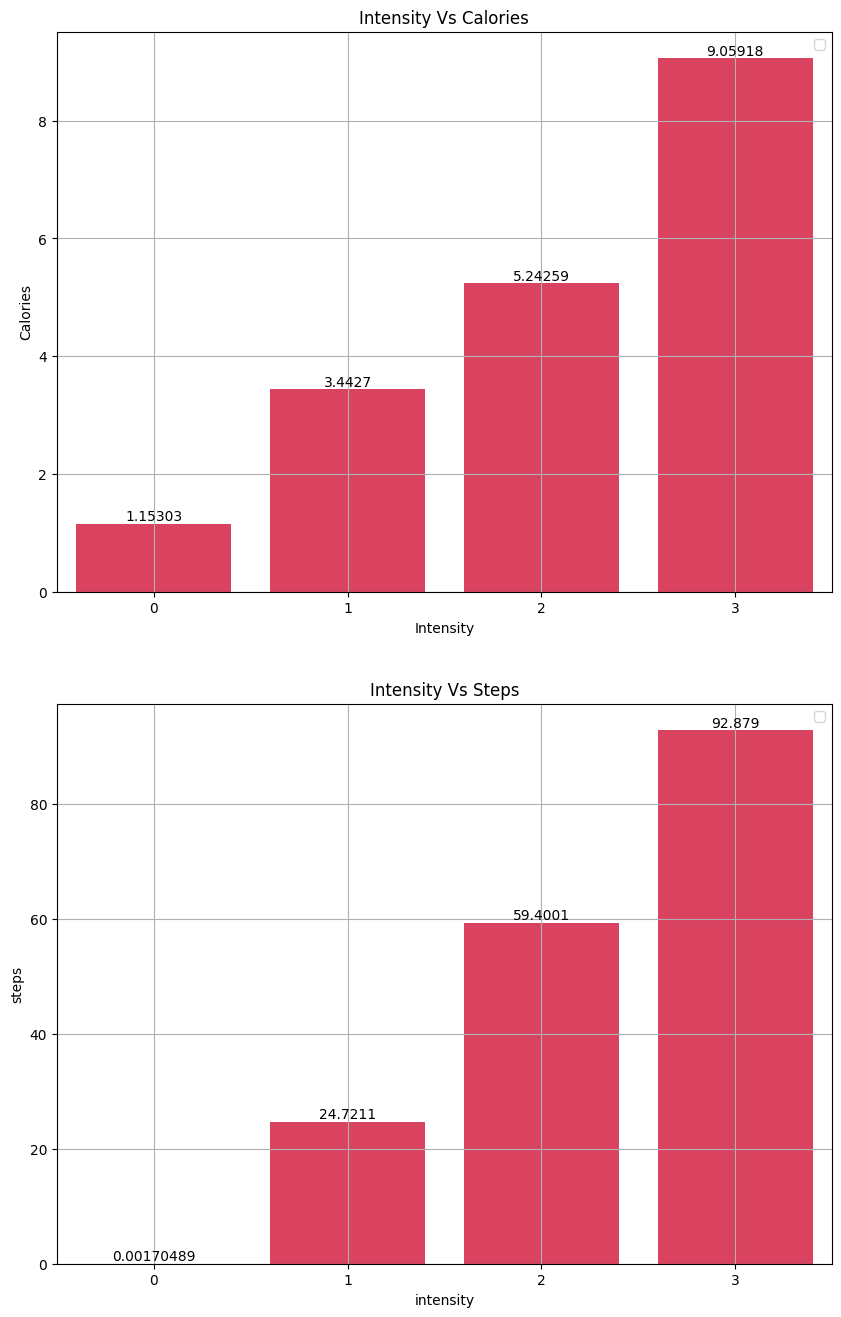

In [139]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 16))

minute_merged_grouped = minute_merged.groupby('Intensity',as_index=False)['Calories','Steps'].mean().sort_values(by='Calories',ascending = False)

plot1 = sns.barplot(data = minute_merged_grouped, x = 'Intensity', y='Calories', color = "#f22a51", ax = axes[0])
for bars in plot1.containers:
    plot1.bar_label(bars)
axes[0].set_title('Intensity Vs Calories')
axes[0].set_ylabel('Calories')
axes[0].set_xlabel('Intensity')
axes[0].legend()
axes[0].grid()

plot2 = sns.barplot(data = minute_merged_grouped, x = 'Intensity', y='Steps', color = "#f22a51", ax = axes[1])
for bars in plot2.containers:
    plot2.bar_label(bars)
axes[1].set_title('Intensity Vs Steps')
axes[1].set_ylabel('steps')
axes[1].set_xlabel('intensity')
axes[1].legend()

axes[1].grid()

plt.show()

###### Key Points
1. As expected , the trend in both the graph shows the positive slope. Both , the calories and the steps increase as the person pushes through each intensity level
2. 3 being the highest intensity level corresponds to 92 steps per minute and 9 calories burnt per minute where as these values go down with the decrement in the intensity level.
3. At an intensity of 0 which correspnds to maybe some or almost no movement at all , plots upto almost 0 steps taken in the minute marked with 0 intensity and 1.15 calories are burnt per minute which is obvious as the body keeps functioning regardless of the intensity level.

#### 5. MET vs Calories


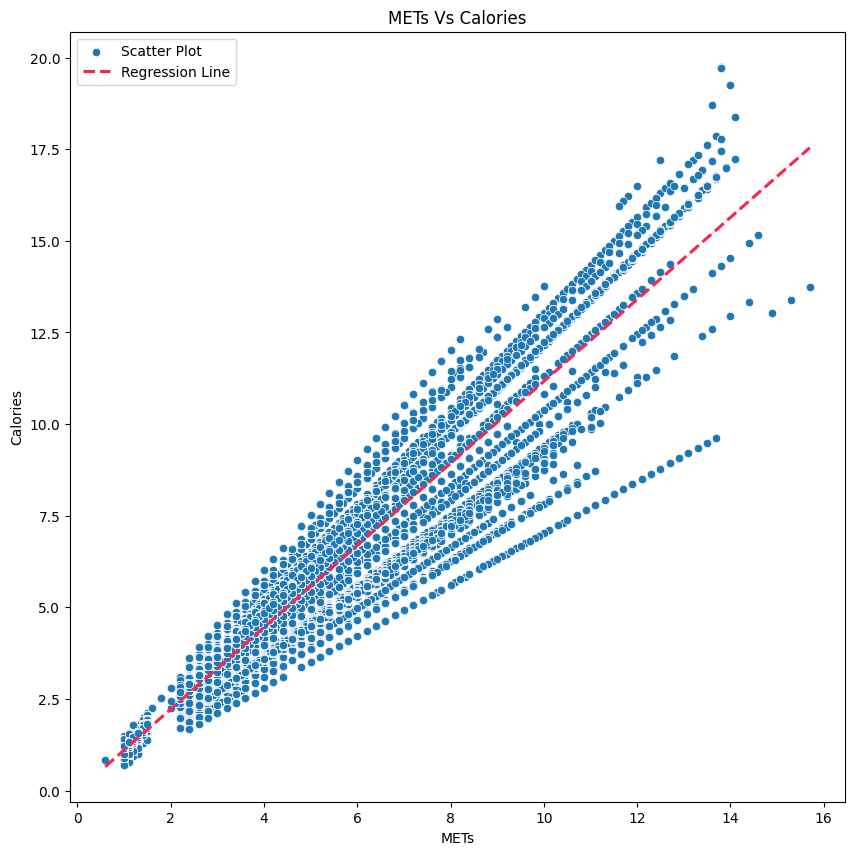

In [143]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))

sns.scatterplot(y=minute_merged['Calories'], x=minute_merged['METs'], ax=axes, label='Scatter Plot')
sns.regplot(data=minute_merged, x='METs', y='Calories', ax=axes, color="#f22a51", scatter=False, line_kws={'linestyle': '--'}, label='Regression Line')
axes.set_title('METs Vs Calories')
axes.set_ylabel('Calories')
axes.set_xlabel('METs')
axes.legend()
plt.show()


#### 6. SedentaryMinutes vs TotalActiveMinutes

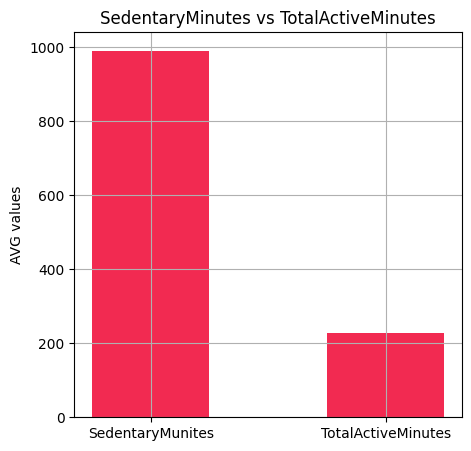

In [144]:
fig, ax = plt.subplots(figsize=(5,5))
x = ['SedentaryMunites','TotalActiveMinutes']
y = np.array([daily_activity['SedentaryMinutes'].mean(),daily_activity['TotalActiveMinutes'].mean()])
a = ax.bar(x, y, width = 0.5,color="#f22a51")
ax.set(title = "SedentaryMinutes vs TotalActiveMinutes",ylabel="AVG values")
plt.grid()
plt.show()

###### Key Points
1. There is a huge gap between SedentaryMinutes and TotalActiveMinutes.
2. It is obvious that the users spend more time sitting or lying down, than they do being active. This can also say something about their occupation or lifestyle. Mostly likely they belong to the working class that spends countless hours behind their desk.

#### 7. Total calories burnt by days of Week

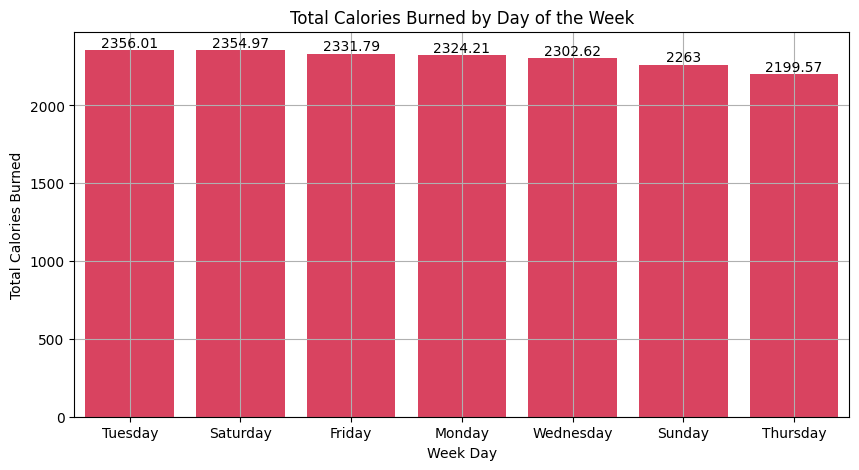

In [150]:
daily_totals = daily_activity.groupby('WeekDay',as_index=False)['Calories'].mean().sort_values(by='Calories',ascending = False)
plt.figure(figsize=(10, 5))
plot = sns.barplot(data=daily_totals, x='WeekDay', y='Calories', color="#f22a51")
for bars in plot.containers:
    plot.bar_label(bars)


plt.xlabel("Week Day")
plt.ylabel("Total Calories Burned")
plt.title("Total Calories Burned by Day of the Week")

plt.grid()

plt.show()

###### Key points
1. Calories burnt for an average individual is atleast 1800 , and the trend specifies that the indviduals are fitness oriented . The graph shows us on an average 2300 cals burned evry day .
2. Saturday is the weekend so the users have enough time to do workout or any outdoor activities .
3. We have 4 Weekdays with 2300+ cals count meaning that the individuals manage to engage in workout during the weekdays too .
4. Sunday is a rest day , and thursday might be 'Do nothing except work' day explaining the lowest calorie burnt count.

#### 8. Most and Least active hours of the day 

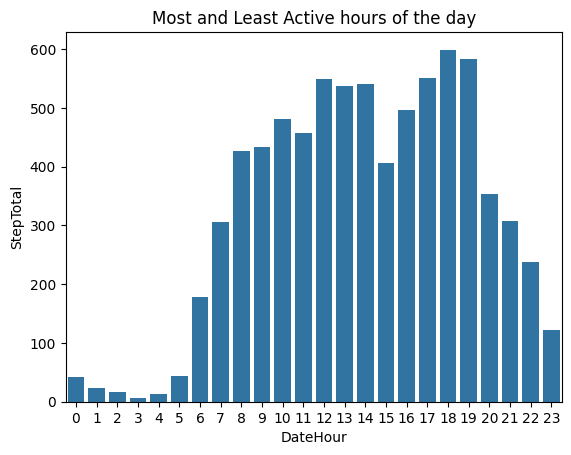

In [146]:
dataframe = merge_df.groupby('DateHour',as_index=False)['StepTotal'].mean()
sns.barplot(data =dataframe,x='DateHour', y='StepTotal')
plt.title('Most and Least Active hours of the day')
plt.show()

###### Key points
Here we can see that their day starts getting really busy from 8 in the morning all the way to 7 in the evening. The least active hours of the day are between 8 p.m and 10 p.m. These are probably the best hours to reach them with targetted ads or for a survey.

#### 8. Total steps by day of the week

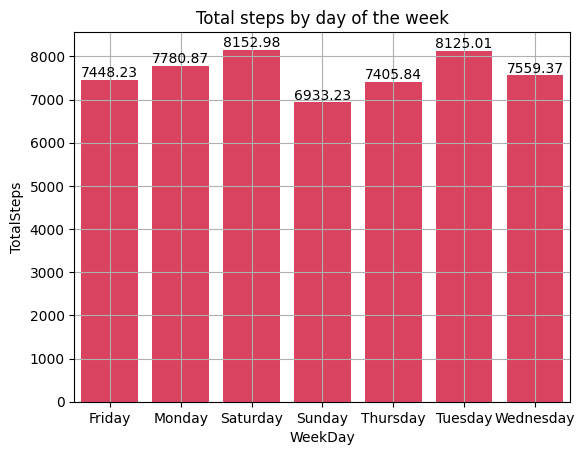

In [147]:
group = daily_activity.groupby('WeekDay',as_index=False)['TotalSteps'].mean()
plot = sns.barplot(data = group, x='WeekDay', y='TotalSteps',color="#f22a51")

for bars in plot.containers:
    plot.bar_label(bars)

plt.title("Total steps by day of the week")

plt.grid()

plt.show()

###### Key points
* Most steps recorded are on Saturday and Tuesday which also have the top values for most calories burnt on weekdays, and on the contrary Sunday and Wednesday are the ones with least steps and also with least Calories burnt on weekday

#### 9. Total sleep by day of the week

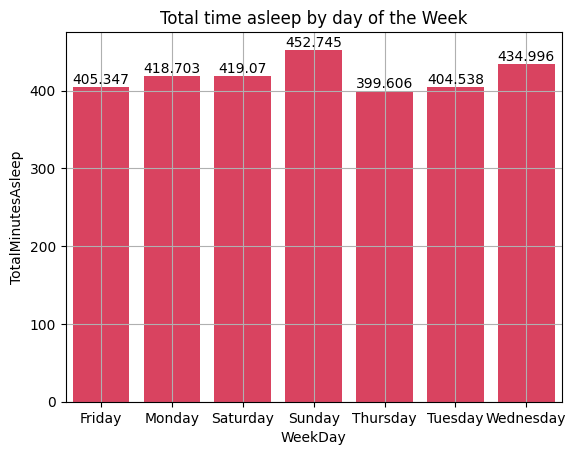

In [152]:
group = sleepday.groupby('WeekDay',as_index=False)['TotalMinutesAsleep'].mean()
plot = sns.barplot(data = group, x='WeekDay',y='TotalMinutesAsleep', color="#f22a51")
for bars in plot.containers:
    plot.bar_label(bars)
plt.grid()
plt.title("Total time asleep by day of the Week")
plt.show()

###### Key points
1. Sunday is on the top for most sleep, which is explainable as sunday is one of the days with least calories burnt in a day.
2. Tuesday and Friday have approx 6.5 to 7 hrs of sleeptime recorded and they are on top three for most calorie consumption, easily marking the tough and worktight days of the week.